# Sanity checks

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np

from hydrant.topology import sanity_checks

import os
import subprocess

In [2]:
# reading geofabric files
ab_c = gpd.read_file('./merit-basins-AB-boundaries/ab_catchments.shp')
ab_r = gpd.read_file('./merit-basins-AB-boundaries/ab_rivers.shp')

<AxesSubplot:>

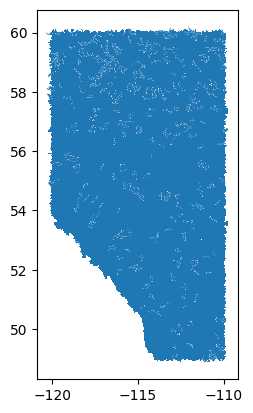

In [3]:
ab_c.plot()

In [4]:
ab_c

,COMID,unitarea,hillslope,geometry
0,71005515,48.357629,0,"MULTIPOLYGON (((-109.91708 56.33292, -109.9162..."
1,71005522,0.363465,0,"POLYGON ((-109.99875 56.34625, -109.99792 56.3..."
2,71005559,1.329143,0,"POLYGON ((-110.01125 56.36792, -110.00958 56.3..."
3,71005741,20.536110,0,"MULTIPOLYGON (((-109.96208 56.41875, -109.9595..."
4,71006087,42.246746,0,"POLYGON ((-109.88375 56.18208, -109.88292 56.1..."
...,...,...,...,...
14975,82043079,26.496361,0,"MULTIPOLYGON (((-117.64042 52.46708, -117.6395..."
14976,82043080,60.933375,0,"MULTIPOLYGON (((-117.81792 52.49042, -117.8170..."
14977,82043081,27.319907,0,"MULTIPOLYGON (((-117.81792 52.48958, -117.8170..."
14978,82043082,33.503802,0,"POLYGON ((-117.41542 52.53375, -117.41292 52.5..."


In [5]:
ab_r

,COMID,lengthkm,lengthdir,sinuosity,slope,uparea,order,strmDrop_t,slope_taud,NextDownID,maxup,up1,up2,up3,up4,hillslope,geometry
0,71005515,8.672582,5.458004,1.588966,0.000231,414.561949,2,0.0,0.000000,-9999,2,71005522,71006257,0,0,0,"LINESTRING (-109.91583 56.33250, -109.91667 56..."
1,71005522,0.397224,0.384626,1.032753,1.000000,265.421631,2,0.0,0.000000,71005515,2,71005559,71006461,0,0,0,"LINESTRING (-110.00417 56.32917, -110.00417 56..."
2,71005559,2.290288,2.238674,1.023056,0.000437,164.688587,2,0.0,0.000000,71005522,2,71005741,71006509,0,0,0,"LINESTRING (-110.00583 56.33250, -110.00583 56..."
3,71005741,8.602263,7.241931,1.187841,0.000859,133.772621,2,7.4,0.000859,71005559,2,71006544,71006564,0,0,0,"LINESTRING (-110.00167 56.35250, -110.00083 56..."
4,71006087,7.518584,4.769119,1.576514,0.000532,42.246746,1,0.0,0.000000,-9999,0,0,0,0,0,0,"LINESTRING (-109.85417 56.16833, -109.85500 56..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14975,82043079,0.994277,0.739890,1.343818,0.048269,26.496361,1,48.1,0.048269,82042494,0,0,0,0,0,0,"LINESTRING (-117.65833 52.45500, -117.65750 52..."
14976,82043080,5.632788,4.310872,1.306647,0.009834,60.933375,1,55.5,0.009834,82042497,0,0,0,0,0,0,"LINESTRING (-117.81667 52.49000, -117.81750 52..."
14977,82043081,2.831781,2.045592,1.384333,0.063094,27.319907,1,178.9,0.063094,82042497,0,0,0,0,0,0,"LINESTRING (-117.81667 52.49000, -117.81750 52..."
14978,82043082,2.702796,2.330223,1.159887,0.065090,33.503802,1,176.2,0.065090,82043058,0,0,0,0,0,0,"LINESTRING (-117.36667 52.46750, -117.36583 52..."


## Checking cycles

In [6]:
cycles = sanity_checks.find_cycles(ab_r, main_id='COMID', ds_main_id='NextDownID')

[]


No cycles found!

## Checking spatial connectivity

In [7]:
conns, wrong_conns = sanity_checks.spatial_conn(ab_r, main_id='COMID', ds_main_id='NextDownID', outlet_id_value=-9999)

In [8]:
wrong_conns

{}

No spatial connectivity issues found!

## Finding lonest branch of river segments

In [9]:
nodes = sanity_checks.longest_branch(ab_r, main_id='COMID', ds_main_id='NextDownID')

In [11]:
len(nodes)

253